# Análise de resultados do IMI - Feedback da sessão de julgamento

Este notebook procura fazer a análise das respostas da pesquisa de feedback da sessão de julgamento do TST. Para isso, as seguintes ações serão realizadas:

- Recuperação das perguntas formuladas, para mapeamento das questões conforme o id do IMI
- Identificação de quais perguntas são reversas (Tp = R)
- Mapeamento das respostas para cada pergunta
- Cálculo do valor da resposta das perguntas reversas seguindo a fórmula: (Valor máximo Escala de Likert + 1 ) - Valor da resposta
- Cálculo da confiabilidade com o Alpha de Cronbach
- Cálculo da Média e Desvio Padrão
- Similaridade: Correlação de Pearson

## Importação das bibliotecas

Utilizaremos as seguintes bibliotecas:
- pandas: Permite criar DataFrames a partir dos arquivos Excel
- numpy: Biblioteca estatítica do Python
- pingouin: Lib que permite o cálculo do Alpha de Cronbach
- matplotlib e seaborn: Bibliotecas que permitem plotar gráficos

In [318]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns


## Recuperação das perguntas

Abriremos o arquivo `imi-perguntas.xlsx` para criar os DataFrames:

In [319]:
perguntasImi = pd.read_excel('arquivos/imi-perguntas.xlsx', sheet_name='IMI Grupo 1')
print(perguntasImi)

    Id Sc   Tp                               Pergunta (Português)  \
0    1  I  NaN      Tive muito prazer em realizar esta atividade.   
1    2  I  NaN             Foi divertido realizar esta atividade.   
2    3  I    R                     Achei esta atividade monótona.   
3    4  I    R      Não prestei qualquer atenção nesta atividade.   
4    5  I  NaN  Eu descreveria esta atividade como muito inter...   
5    8  P  NaN      Sou razoavelmente competente nesta atividade.   
6    9  P  NaN  Creio ter me saído muito bem nesta atividade, ...   
7   11  P  NaN  Estou satisfeito com o meu desempenho nesta at...   
8   13  P    R  Esta foi uma atividade que eu não poderia faze...   
9   14  E  NaN       Fiz um esforço considerável nesta atividade.   
10  15  E    R  Não me esforcei muito para ter um bom desempen...   
11  16  E  NaN           Eu me esforcei bastante nesta atividade.   
12  17  E  NaN  Foi importante para mim ter um bom desempenho ...   
13  19  T    R  Não fiquei nem um 

Recuperaremos apenas as colunas de interesse: ID, Sc, Tp, Perguntas adaptadas com ajustes para envio

In [320]:
dfPerguntas = pd.DataFrame().assign(id=perguntasImi['Id'], sc=perguntasImi['Sc'], tp=perguntasImi['Tp'],perguntaAdaptada=perguntasImi['Perguntas adaptadas com ajustes para envio'], perguntaOriginal=perguntasImi['Pergunta (Português)'])
print(dfPerguntas)

    id sc   tp                                   perguntaAdaptada  \
0    1  I  NaN  Foi prazeroso ajudar o TST com a pesquisa de f...   
1    2  I  NaN                                                NaN   
2    3  I    R  Achei monótono responder a pesquisa de feedbac...   
3    4  I    R                                                NaN   
4    5  I  NaN  Eu achei que responder à pesquisa de feedback ...   
5    8  P  NaN  Sou razoavelmente competente para sugerir melh...   
6    9  P  NaN                                                NaN   
7   11  P  NaN                                                NaN   
8   13  P    R  Sugerir melhorias com pesquisas de feedback pa...   
9   14  E  NaN  Fiz um esforço considerável em responder a pes...   
10  15  E    R                                                NaN   
11  16  E  NaN                                                NaN   
12  17  E  NaN                                                NaN   
13  19  T    R                    

Agora, filtraremos o dataset para trazer apenas os registros que possuem perguntas adaptadas:

In [321]:
dfPerguntasFiltradas = dfPerguntas.query('perguntaAdaptada.notnull()')
print(dfPerguntasFiltradas)

    id sc   tp                                   perguntaAdaptada  \
0    1  I  NaN  Foi prazeroso ajudar o TST com a pesquisa de f...   
2    3  I    R  Achei monótono responder a pesquisa de feedbac...   
4    5  I  NaN  Eu achei que responder à pesquisa de feedback ...   
5    8  P  NaN  Sou razoavelmente competente para sugerir melh...   
8   13  P    R  Sugerir melhorias com pesquisas de feedback pa...   
9   14  E  NaN  Fiz um esforço considerável em responder a pes...   
15  21  T    R  Fiquei bem à vontade enquanto respondia a pesq...   
17  23  T  NaN  Eu me senti pressionado(a) enquanto respondia ...   
23  29  C  NaN  Respondi a pesquisa de feedback para o TST por...   
24  30  C    R  Respondi a pesquisa de feedback para o TST por...   
25  32  V  NaN  Acho que responder a pesquisa de feedback é út...   
27  35  V  NaN  Creio que responder a pesquisa de feedback par...   
31  40  R  NaN  Senti que posso confiar nas pesquisa de feedba...   
32  41  R  NaN  Gostaria de intera

## Recuperação das respostas

Faremos agora o carregamento das respostas enviadas do formulário:

In [322]:
dfRespostas = pd.read_excel('arquivos/respostas-questionario.xlsx')
print(dfRespostas)

      Carimbo de data/hora  \
0  2022-12-08 11:09:37.891   
1  2022-12-08 11:17:20.247   
2  2022-12-08 11:24:41.264   
3  2022-12-08 11:38:58.288   
4  2022-12-08 11:49:07.551   
5  2022-12-08 13:20:46.608   
6  2022-12-08 14:11:07.361   
7  2022-12-08 15:08:20.335   
8  2022-12-08 15:12:21.118   
9  2022-12-08 19:23:04.912   
10 2022-12-09 08:45:03.231   
11 2022-12-09 10:33:57.132   
12 2022-12-09 11:18:33.257   
13 2022-12-11 06:38:50.143   
14 2022-12-12 06:20:09.375   

    Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.  \
0                                                   4                                               
1                                                   5                                               
2                                                   3                                               
3                                                   5                                               
4             

In [323]:
dfRespostas = dfRespostas.drop(columns=['Carimbo de data/hora'])
print(dfRespostas)

    Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.  \
0                                                   4                                               
1                                                   5                                               
2                                                   3                                               
3                                                   5                                               
4                                                   3                                               
5                                                   5                                               
6                                                   5                                               
7                                                   3                                               
8                                                   4                                      

Definição de funções que ajudarão a ajustar o DataFrame:

In [324]:
def getIdFromColumnName(valor:str, nomeDaColuna: str, df: pd.DataFrame)->int :
    row = df.loc[df[nomeDaColuna]== valor]
    return row.iloc[0]['id']

print(getIdFromColumnName('Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.', 'perguntaAdaptada', dfPerguntasFiltradas))


5


In [325]:
def getTpById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['tp']

def getPerguntaById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['perguntaAdaptada']


print(getTpById('3',  dfPerguntasFiltradas))

R


Vamos modificar o nome das colunas para que correspondam ao ID do questionário IMI:

In [326]:
dfRespostasComId = dfRespostas.copy()
columnsDictionary = {}
for coluna in dfRespostas.columns:
    idColuna = str(getIdFromColumnName(coluna, 'perguntaAdaptada', dfPerguntasFiltradas))
    columnsDictionary[coluna] = idColuna

print(columnsDictionary)
dfRespostasComId.rename(columns = columnsDictionary, inplace=True)
print(dfRespostasComId)

{'Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.': '5', 'Acho que responder a pesquisa de feedback é útil para melhorar a atividade jurisdicional do TST.': '32', 'Senti que posso confiar nas pesquisa de feedback sobre sessões de julgamento do TST.': '40', 'Eu me senti pressionado(a) enquanto respondia a pesquisa de feedback para o TST.': '23', 'Foi prazeroso ajudar o TST com a pesquisa de feedback da sessão.': '1', 'Fiz um esforço considerável em responder a pesquisa de feedback para avaliar as sessões de julgamento do TST.': '14', 'Creio que responder a pesquisa de feedback para o TST pode me ajudar a ter uma melhor participação em sessões de julgamento.': '35', 'Respondi a pesquisa de feedback para o TST porque eu tinha que fazer isso.': '30', 'Achei monótono responder a pesquisa de feedback para o TST.': '3', 'Gostaria de interagir mais frequentemente com o TST.': '41', 'Sugerir melhorias com pesquisas de feedback para o TST não é algo 

## Ajuste das perguntas reversas

Agora faremos os ajustes para as respostas que tem o Tp = 'R', o que indica que o valor deverá ser modificado para refletir a resposta ajustada. O primeiro passo será criar uma coluna com o valor da escala de Linkert utilizada (no nosso caso, 5) acrescido de 1, para que possamos subtrair essa coluna do nosso DataFrame:

In [327]:
# Criando uma coluna com valores 6 para permitir a subtração da coluna inteira
numeroRegistros =  dfRespostas.shape[0]
s = pd.Series(6)
listaComNumerosAjuste = s.repeat(numeroRegistros)
listaComNumerosAjuste = listaComNumerosAjuste.reset_index(drop=True)
print(listaComNumerosAjuste)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
dtype: int64


Após isso, inspecionaremos as colunas para identificar aquelas que devem ser revertidas, ou seja, que contenham o Tp = R na planilha de perguntas do IMI

In [328]:

dfRespostasAjustadas = dfRespostasComId.copy()
for col in dfRespostasAjustadas.columns:
    if (col.isdigit() and getTpById(col, dfPerguntasFiltradas) == 'R'):
        print('Coluna '+ col+ ' tem o Tp = R')
        dfRespostasAjustadas[col] = listaComNumerosAjuste - dfRespostasAjustadas[col]
print('Respostas originais')
print(dfRespostasComId)
print('Respostas ajustadas')
print(dfRespostasAjustadas)

Coluna 30 tem o Tp = R
Coluna 3 tem o Tp = R
Coluna 13 tem o Tp = R
Coluna 43 tem o Tp = R
Coluna 21 tem o Tp = R
Respostas originais
    5  32  40  23  1  14  35  30  3  41  13  8  43  21  29
0   4   4   4   2  3   4   4   4  3   2   3  4   4   4   4
1   5   5   5   1  5   3   5   1  1   5   1  5   1   5   5
2   3   4   4   1  4   3   4   1  1   3   3  1   3   3   3
3   5   5   5   1  3   1   1   1  1   1   3  3   1   5   5
4   3   5   3   5  5   2   3   2  1   5   1  4   3   5   5
5   5   5   5   1  5   2   4   4  2   5   3  3   2   5   5
6   5   5   5   1  5   1   5   1  1   5   1  3   1   5   5
7   3   1   1   4  3   2   1   4  3   4   1  4   5   2   4
8   4   5   4   1  4   1   3   1  3   4   1  5   4   4   5
9   5   5   5   1  5   4   2   1  1   5   1  5   1   5   5
10  5   4   5   1  5   1   5   1  1   4   3  3   1   4   5
11  5   5   5   1  5   1   5   1  1   5   5  5   1   5   5
12  5   5   5   1  5   2   5   1  1   5   1  5   1   5   5
13  4   4   4   1  4   1   4   1  1   4 

## Cálculo do Alpha de Cronbach

Com esses valores, podemos fazer agora o cálculo do Alpha de Cronbach:

In [329]:
pg.cronbach_alpha(data=dfRespostasAjustadas)

(0.6352218306677508, array([0.295, 0.856]))

O valor de 0.63 indica que as respostas não estão confiáveis. Vamos retirar alguma pergunta da nossa análise. Para tal, definiremos a função abaixo:

In [330]:
def dropColumnById(column:str, df:pd.DataFrame)->pd.DataFrame:
    return df.drop(columns=[column])


A pergunta que será retirada será a com id 21, pois é uma pergunta reversa diferente: é uma pergunta com viés positivo no bloco de Pressão/Tensão.

In [331]:
dfRespostasAjustadasSemPergunta21 = dropColumnById('21', dfRespostasAjustadas)
print(dfRespostasAjustadasSemPergunta21)

    5  32  40  23  1  14  35  30  3  41  13  8  43  29
0   4   4   4   2  3   4   4   2  3   2   3  4   2   4
1   5   5   5   1  5   3   5   5  5   5   5  5   5   5
2   3   4   4   1  4   3   4   5  5   3   3  1   3   3
3   5   5   5   1  3   1   1   5  5   1   3  3   5   5
4   3   5   3   5  5   2   3   4  5   5   5  4   3   5
5   5   5   5   1  5   2   4   2  4   5   3  3   4   5
6   5   5   5   1  5   1   5   5  5   5   5  3   5   5
7   3   1   1   4  3   2   1   2  3   4   5  4   1   4
8   4   5   4   1  4   1   3   5  3   4   5  5   2   5
9   5   5   5   1  5   4   2   5  5   5   5  5   5   5
10  5   4   5   1  5   1   5   5  5   4   3  3   5   5
11  5   5   5   1  5   1   5   5  5   5   1  5   5   5
12  5   5   5   1  5   2   5   5  5   5   5  5   5   5
13  4   4   4   1  4   1   4   5  5   4   5  4   5   5
14  4   5   5   1  5   1   5   5  5   5   4  3   5   5


In [332]:
pg.cronbach_alpha(data=dfRespostasAjustadasSemPergunta21)

(0.7345443929884158, array([0.485, 0.895]))

Como o Alpha deu maior de 0.7, podemos seguir com a nossa análise.

# Análise estatística

Com o resultado ajustado, podemos verificar algumas estatísticas do DataFrame:

In [333]:
dfRespostasAjustadasSemPergunta21.describe()

,5,32,40,23,1,14,35,30,3,41,13,8,43,29
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,4.333333,4.466667,4.333333,1.533333,4.400000,1.933333,3.733333,4.333333,4.533333,4.133333,4.000000,3.800000,4.000000,4.733333
std,0.816497,1.060099,1.112697,1.245946,0.828079,1.099784,1.437591,1.234427,0.833809,1.245946,1.253566,1.146423,1.414214,0.593617
min,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,3.000000,4.500000,4.500000,4.000000,3.000000,3.000000,3.000000,5.000000
50%,5.000000,5.000000,5.000000,1.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,1.000000,5.000000,2.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Análise de correlação

Podemos visualizar a distribuição das respostas por meio de um histograma:

In [334]:
# for col in dfRespostasAjustadas.columns:
#     ax = sns.histplot(data=dfRespostasAjustadas[col])

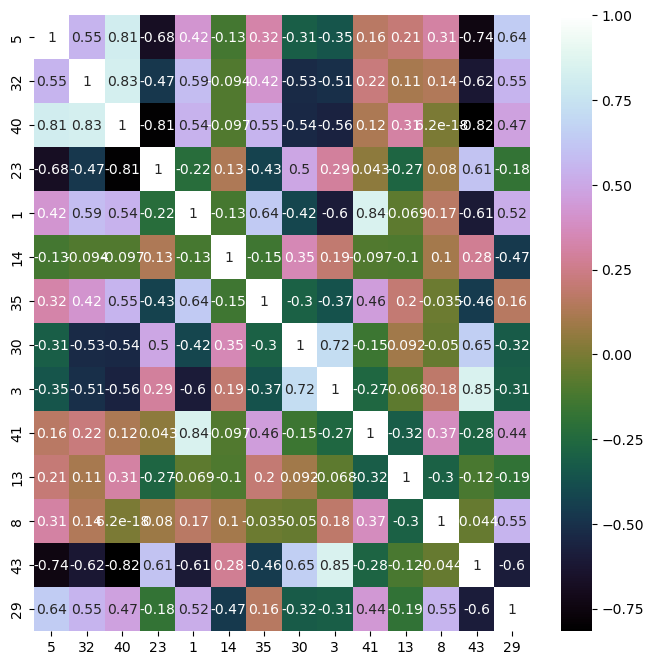

In [336]:
# for col in dfRespostasAjustadas.columns:
# col = '5'
# ax = sns.histplot(data=dfRespostasAjustadas[col])
dfRespostasOriginaisSemPergunta21 = dropColumnById('21', dfRespostasComId)
correlacoes = dfRespostasOriginaisSemPergunta21.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlacoes, annot=True, cmap='cubehelix');

Para averiguar as maiores correlações, podemos analisar o triângulo superior da matriz quadrada, removendo os valores que estão abaixo da diagonal de correlação total (correlação = 1):


In [337]:
correlacoesAbsolutas = correlacoes.abs()
upper_tri = correlacoesAbsolutas.where(np.triu(np.ones(correlacoesAbsolutas.shape),k=1).astype(bool))
print(upper_tri)



     5        32        40        23         1        14        35        30  \
5  NaN  0.550149  0.812421  0.678727  0.422577  0.132574  0.324550  0.307096   
32 NaN       NaN  0.827582  0.472288  0.585850  0.093941  0.415576  0.527639   
40 NaN       NaN       NaN  0.807184  0.542652  0.097283  0.550732  0.537366   
23 NaN       NaN       NaN       NaN  0.221540  0.132056  0.433345  0.495377   
1  NaN       NaN       NaN       NaN       NaN  0.125491  0.636020  0.419263   
14 NaN       NaN       NaN       NaN       NaN       NaN  0.147582  0.350758   
35 NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.295170   
30 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
41 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
13 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN    

Com os dados do triângulo superior, vamos verificar quais perguntas tem uma correlação forte ou muito forte (valor acima de 0.7)

In [338]:
s = upper_tri.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
correlacoesFortes = so.loc[lambda x : x >= 0.7]
print(correlacoesFortes)


43  3     0.848044
41  1     0.844619
40  32    0.827582
43  40    0.817057
40  5     0.812421
23  40    0.807184
43  5     0.742307
3   30    0.717101
dtype: float64


Vamos descrever as correlações junto com as perguntas, para verificar se há algum insight:

In [339]:
def getPercentualCorrelacao(linha:str, coluna:str, df: pd.DataFrame)->float:
    return df.loc[linha][coluna]

In [340]:
perguntasCorrelacionadas = []
for perguntas in correlacoesFortes.keys():
    linha = perguntas[0]
    coluna = perguntas[1]
    perguntaLinha = getPerguntaById(linha, dfPerguntasFiltradas)
    perguntaColuna = getPerguntaById(coluna, dfPerguntasFiltradas)
    percentualCorrelacao = getPercentualCorrelacao(linha, coluna, correlacoes)
    perguntasCorrelacionadas.append([perguntaLinha, perguntaColuna,percentualCorrelacao])
    
dfPerguntasCorrelacionadas = pd.DataFrame(perguntasCorrelacionadas, columns=['Pergunta 1', 'Pergunta 2', 'Correlação'])
print(dfPerguntasCorrelacionadas)

                                          Pergunta 1  \
0  Não sinto que posso confiar nesta pesquisa de ...   
1  Gostaria de interagir mais frequentemente com ...   
2  Senti que posso confiar nas pesquisa de feedba...   
3  Não sinto que posso confiar nesta pesquisa de ...   
4  Senti que posso confiar nas pesquisa de feedba...   
5  Eu me senti pressionado(a) enquanto respondia ...   
6  Não sinto que posso confiar nesta pesquisa de ...   
7  Achei monótono responder a pesquisa de feedbac...   

                                          Pergunta 2  Correlação  
0  Achei monótono responder a pesquisa de feedbac...    0.848044  
1  Foi prazeroso ajudar o TST com a pesquisa de f...    0.844619  
2  Acho que responder a pesquisa de feedback é út...    0.827582  
3  Senti que posso confiar nas pesquisa de feedba...   -0.817057  
4  Eu achei que responder à pesquisa de feedback ...    0.812421  
5  Senti que posso confiar nas pesquisa de feedba...   -0.807184  
6  Eu achei que responder 

# Cálculo dos valores das escalas

Feita essa análise inicial, faremos o agrupamento e cálculo das respostas pela escala do IMI

In [341]:
def getPerguntasDaEscala(escala:str, df: pd.DataFrame)->list[str]:
    return df.query("sc==@escala and id!=21")['id']
    

In [342]:
dictEscalasComPerguntas = {}
escalasUtilizadas = dfPerguntasFiltradas['sc'].unique()
for escala in escalasUtilizadas:
    dictEscalasComPerguntas.update({escala:getPerguntasDaEscala(escala, dfPerguntasFiltradas)})
# for index, row in dfPerguntasFiltradas.iterrows():
print (dictEscalasComPerguntas)

{'I': 0    1
2    3
4    5
Name: id, dtype: int64, 'P': 5     8
8    13
Name: id, dtype: int64, 'E': 9    14
Name: id, dtype: int64, 'T': 17    23
Name: id, dtype: int64, 'C': 23    29
24    30
Name: id, dtype: int64, 'V': 25    32
27    35
Name: id, dtype: int64, 'R': 31    40
32    41
34    43
Name: id, dtype: int64}


In [343]:
def calculaMediaDeRespostasDaEscala(colunasPerguntas:list, dfRespostas:pd.DataFrame)->float:
    dfRespostasEscala = dfRespostas[colunasPerguntas]
    return dfRespostasEscala.stack().mean()



In [344]:
mediasDasEscalas = []
for escalaPergunta in dictEscalasComPerguntas.items():
    escala = escalaPergunta[0]
    colunasPerguntas = map(str,escalaPergunta[1].tolist())
    mediasDasEscalas.append([escala, calculaMediaDeRespostasDaEscala(colunasPerguntas, dfRespostasAjustadasSemPergunta21)])

dfMediaDasEscalas = pd.DataFrame(mediasDasEscalas, columns=['Escala', 'Média'])
print (dfMediaDasEscalas)


  Escala     Média
0      I  4.422222
1      P  3.900000
2      E  1.933333
3      T  1.533333
4      C  4.533333
5      V  4.100000
6      R  4.155556


# Definição do número de técnicas do Octalysis utilizadas para cada escala

Para o nosso projeto, vamos considerar a seguinte tabela de conversão:

| Média da escala | Quantidade de técnicas |
|-----------------|------------------------|
| Maior que 4,5     | 4                      |
| Entre 3,5 e 4,5     | 3                      |
| Entre 2,5 e 3,5     | 2                      |
| Entre 1,5 e 2,5     | 1                      |
| Entre 0 e 1,5   | 0                      |



Dessa forma, temos como resultado final o quantitativo de técnicas abaixo:


In [345]:
def getQuantidadeDeTecnicas(media:float)->int:
    if (media >= 4.5) :
        return 4
    if (media < 4.5 and media >= 3.5):
        return 3
    if (media <3.5 and media >=2.5):
        return 2
    if (media <2.5 and media >=1.5):
        return 1
    return 0

dfResultadoFinalTecnicas = dfMediaDasEscalas.copy()
dfResultadoFinalTecnicas['Quantidade de técnicas'] = dfResultadoFinalTecnicas.apply(lambda row: getQuantidadeDeTecnicas(row['Média']), axis=1)
print(dfResultadoFinalTecnicas)

  Escala     Média  Quantidade de técnicas
0      I  4.422222                       3
1      P  3.900000                       3
2      E  1.933333                       1
3      T  1.533333                       1
4      C  4.533333                       4
5      V  4.100000                       3
6      R  4.155556                       3
